<a href="https://colab.research.google.com/github/MANMANJIJI/Lending-club/blob/develop/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 정보 및 EDA

### 1. 데이터 정보

#### 1-1. 데이터 불러오기

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

# Pandas options : 전체 column 표시
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')


# 데이터 불러오기
df_dta = pd.read_stata("/content/drive/MyDrive/code_study/lending club/data/lendingclub_train")
df_dta.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,addr_state1,addr_state2,addr_state3,addr_state4,addr_state5,addr_state6,addr_state7,addr_state8,addr_state9,addr_state10,addr_state11,addr_state12,addr_state13,addr_state14,addr_state15,addr_state16,addr_state17,addr_state18,addr_state19,addr_state20,addr_state21,addr_state22,addr_state23,addr_state24,addr_state25,addr_state26,addr_state27,addr_state28,addr_state29,addr_state30,addr_state31,addr_state32,addr_state33,addr_state34,addr_state35,addr_state36,addr_state37,addr_state38,addr_state39,addr_state40,addr_state41,addr_state42,addr_state43,addr_state44,addr_state45,addr_state46,addr_state47,addr_state48,addr_state49,addr_state50,addr_state51,initial_list_status1,initial_list_status2,elapsed_t,issue_d1,issue_d2,issue_d3,issue_d4,issue_d5,issue_d6,issue_d7,issue_d8,issue_d9,issue_d10,issue_d11,issue_d12,issue_d13,issue_d14,issue_d15,issue_d16,issue_d17,issue_d18,issue_d19,issue_d20,issue_d21,issue_d22,issue_d23,issue_d24,issue_d25,issue_d26,issue_d27,issue_d28,issue_d29,issue_d30,issue_d31,issue_d32,issue_d33,issue_d34,issue_d35,issue_d36,issue_d37,issue_d38,issue_d39,issue_d40,issue_d41,issue_d42,issue_d43,issue_d44,issue_d45,issue_d46,issue_d47,issue_d48,issue_d49,issue_d50,issue_d51,issue_d52,issue_d53,issue_d54,issue_d55,issue_d56,issue_d57,issue_d58,issue_d59,issue_d60,issue_d61,issue_d62,issue_d63,issue_d64,issue_d65,issue_d66,issue_d67,issue_d68,issue_d69,issue_d70,issue_d71,issue_d72,issue_d73,issue_d74,issue_d75,issue_d76,issue_d77,issue_d78,issue_d79,issue_d80,issue_d81,issue_d82,issue_d83,issue_d84,issue_d85,issue_d86,issue_d87,issue_d88,issue_d89,issue_d90,issue_d91,issue_d92,issue_d93,issue_d94,issue_d95,issue_d96,issue_d97,issue_d98,issue_d99,issue_d100,issue_d101,issue_d102,issue_d103,issue_d104,issue_d105,issue_d106,issue_d107,issue_d108,issue_d109,issue_d110,issue_d111,issue_d112,issue_d113,issue_d114,issue_d115,issue_d116,issue_d117,issue_d118,debt_settlement_flag1,term1,depvar,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,mths_since_last_major_derog1,mths_since_last_major_derog2,mths_since_last_major_derog3,mths_since_last_major_derog4,mths_since_last_major_derog5,mths_since_last_major_derog6,mths_since_last_major_derog7,mths_since_last_major_derog8,mths_since_last_major_derog9,mths_since_last_major_derog10,mths_since_last_major_derog11,mths_since_last_record1,mths_since_last_record2,mths_since_last_record3,mths_since_last_record4,mths_since_last_record5,mths_since_last_record6,mths_since_last_record7,mths_since_last_record8,mths_since_last_record9,mths_since_last_record10,mths_since_last_record11,mths_since_rcnt_il1,mths_since_rcnt_il2,mths_since_rcnt_il3,mths_since_rcnt_il4,mths_since_rcnt_il5,mths_since_rcnt_il6,mths_since_rcnt_il7,mths_since_rcnt_il8,mths_since_rcnt_il9,mths_since_rcnt_il10,mths_since_rcnt_il11,mths_since_recent_bc1,mths_since_recent_bc

#### 1-2. 데이터 요약
334개의 Column과 874335개의 값을 가진 데이터임을 알 수 있다.

In [3]:
df_dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874335 entries, 0 to 874334
Columns: 334 entries, index to mths_since_recent_revol_delinq11
dtypes: float32(2), float64(16), int16(6), int32(7), int8(303)
memory usage: 406.1 MB


### 2. 데이터 EDA

2-1. 부도 비율, 대출 금액 분포, 이자율 분포, 대출 금액별 월별 상한액

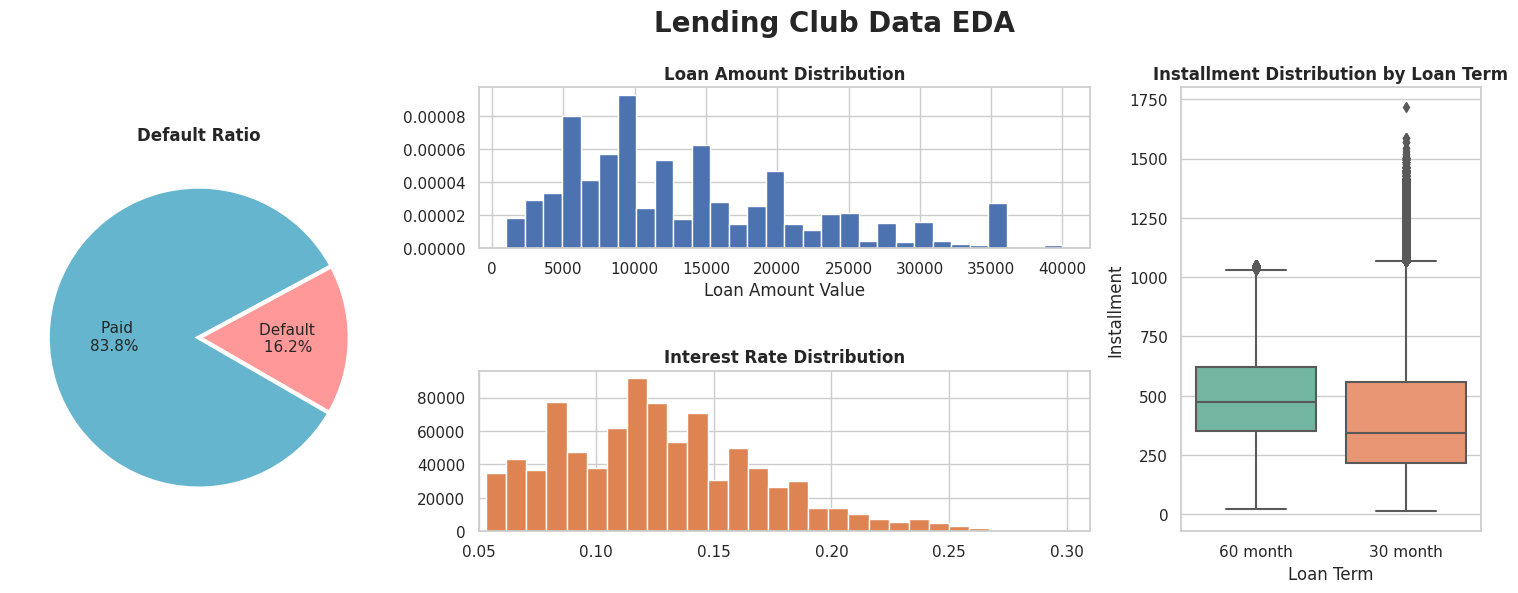

In [4]:
fig = plt.figure()            # Define "figure" instance
fig.set_size_inches(22,6)    # Physical page size in inches, (lx,ly)

# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Title for the page
fig.subplots_adjust(top=0.85)
suptit = "Lending Club Data EDA"
fig.suptitle(suptit,fontsize=20, fontweight = 'bold')

##-- Plotting for axis1 --##
import matplotlib.gridspec as gridspec
gs0 = gridspec.GridSpec(8,22)    # (ny,nx)

'''
1. 부도비율
'''
ax1 = plt.subplot(gs0[1:8,0:5])  # gs0[y0(top):y1(bottom),x0(left):x1(right)]
# 필요 변수
All = len(df_dta['depvar'])
Charged = len(df_dta.loc[df_dta['depvar']==1])
Paid = len(df_dta.loc[df_dta['depvar']==0])
paid_ratio = [Charged, Paid]
labels = [f'Default \n{Charged/All:^7.1%}', f'Paid \n{Paid/All:.1%}']
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 3}
colors = ['#ff9999', 'c']
title = {
    'fontsize': 12,
    'fontweight': 'bold'
}

ax1.pie(paid_ratio, labels=labels, autopct= '', startangle= 330, wedgeprops=wedgeprops, shadow=False, colors=colors, labeldistance= 0.4)
ax1.set_title("Default Ratio", fontdict=title)

'''
2. 대출 금액 분포
'''
ax2 = plt.subplot(gs0[0:3,6:14])  # gs0[y0(top):y1(bottom),x0(left):x1(right)]
ax2.hist(df_dta["loan_amnt"], bins=30, density= True)
ax2.set_xlabel('Loan Amount Value')
ax2.ticklabel_format(style='plain')
ax2.set_title("Loan Amount Distribution", fontdict=title)

'''
3. 이자율 분포
'''
ax3 = plt.subplot(gs0[5:8,6:14])  # gs0[y0(top):y1(bottom),x0(left):x1(right)]
ax3.hist(df_dta["int_rate"], bins= 30, color= "C1")
ax3.set_xlim([0.05, 0.31])
ax3.set_title("Interest Rate Distribution", fontdict=title)

'''
4. 대출 기간별 월별 상환액
'''
ax4 = plt.subplot(gs0[0:8,15:19])  # gs0[y0(top):y1(bottom),x0(left):x1(right)]
sns.boxplot(y = "installment", x = "term1", data = df_dta, palette = "Set2", ax= ax4)
ax4.set_xticklabels(["60 month", "30 month"])
ax4.set_xlabel('Loan Term')
ax4.set_ylabel('Installment')
ax4.set_title("Installment Distribution by Loan Term", fontdict=title)

plt.show()

#### 2-2. 대출 금액, 펀딩액, 원금 상환액, 이자 상환액 시각화

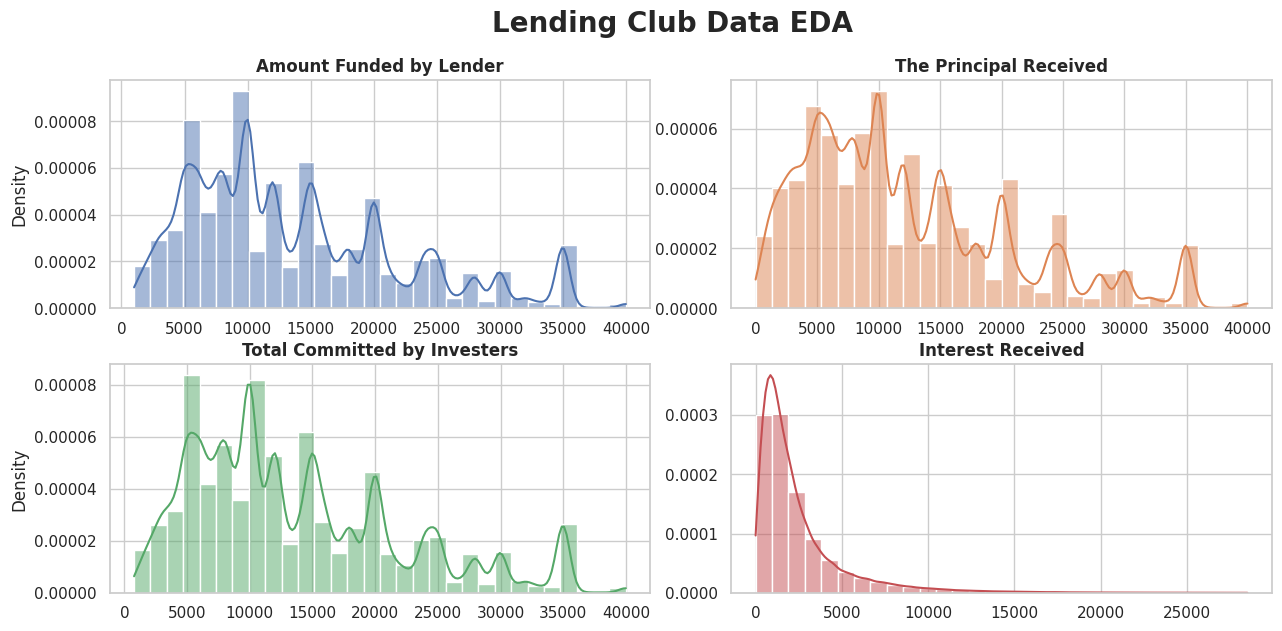

In [5]:
fig = plt.figure()            # Define "figure" instance
fig.set_size_inches(15, 7)    # Physical page size in inches, (lx,ly)

# Title for the page
suptit = "Lending Club Data EDA"
fig.suptitle(suptit,fontsize=20, fontweight = 'bold')

##-- Plotting for axis1 --##
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(21,17)    # (ny,nx)
title_font = {
    'fontsize': 12,
    'fontweight': 'bold'
}
plot_list = {"funded_amnt":"Amount Funded by Lender",
            "total_rec_prncp": "The Principal Received",
            "funded_amnt_inv": "Total Committed by Investers",
            "total_rec_int": "Interest Received"}

for idx,(col, title) in enumerate(plot_list.items()):
    if idx%2 == 0:
        cord = (idx//2)*11
        globals()[f"ax{idx}"] = plt.subplot(gs1[cord:cord+9, 0:8])
        sns.histplot(x=col, data = df_dta,
                    bins= 30,
                    stat= "density", kde= True,
                    color= f"C{idx}",
                    ax = globals()[f"ax{idx}"])
        globals()[f"ax{idx}"].ticklabel_format(style='plain')
        globals()[f"ax{idx}"].set_xlabel("")
        globals()[f"ax{idx}"].set_title(title, fontdict=title_font)

    else:
        cord = (idx//2)*11
        globals()[f"ax{idx}"] = plt.subplot(gs1[cord:cord+9, 9:17])
        sns.histplot(x=col, data = df_dta,
                    bins= 30,
                    stat= "density", kde= True,
                    color= f"C{idx}",
                    ax = globals()[f"ax{idx}"])
        globals()[f"ax{idx}"].ticklabel_format(style='plain')
        globals()[f"ax{idx}"].set_xlabel("")
        globals()[f"ax{idx}"].set_ylabel("")
        globals()[f"ax{idx}"].set_title(title, fontdict=title_font)

plt.show()